In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


# Exploratory Data Analysis

### Category

In [4]:
cat = df.Category.unique()
cat

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

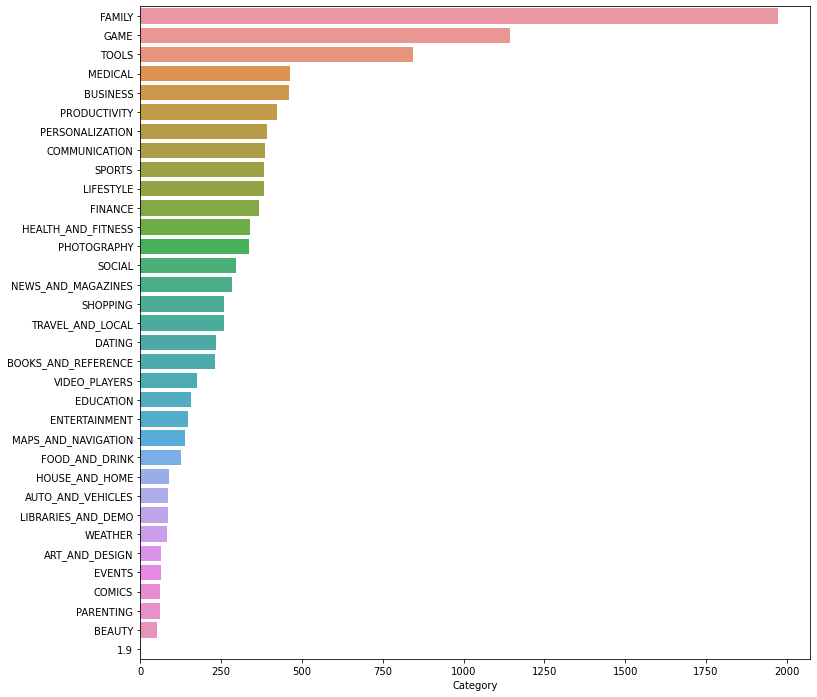

In [5]:
plt.figure(figsize=(12,12))
mostCat = df.Category.value_counts()
sns.barplot(x=mostCat, y=mostCat.index, data=df)

So, there is around 2000 app with family category, followed by game category with 1200 app. And this ‘1.9’ Category, i don’t know what it is, but it only had 1 app so far, so its not visible on the graph.

### Rating

In [6]:
df.Rating.unique()

array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        nan,  4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,
        3. ,  1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,
        1.8,  2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

There we had a null values, I am going to leave it as it is. And a 19 for rating is not possible, so i assume it’s a ‘1.9’. So let’s change it and see the distribution value on rating column.

In [7]:
df['Rating'].replace(to_replace=[19.0], value=[1.9],inplace=True)

D:\Anaconda\lib\site-packages\numpy\core\_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
D:\Anaconda\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


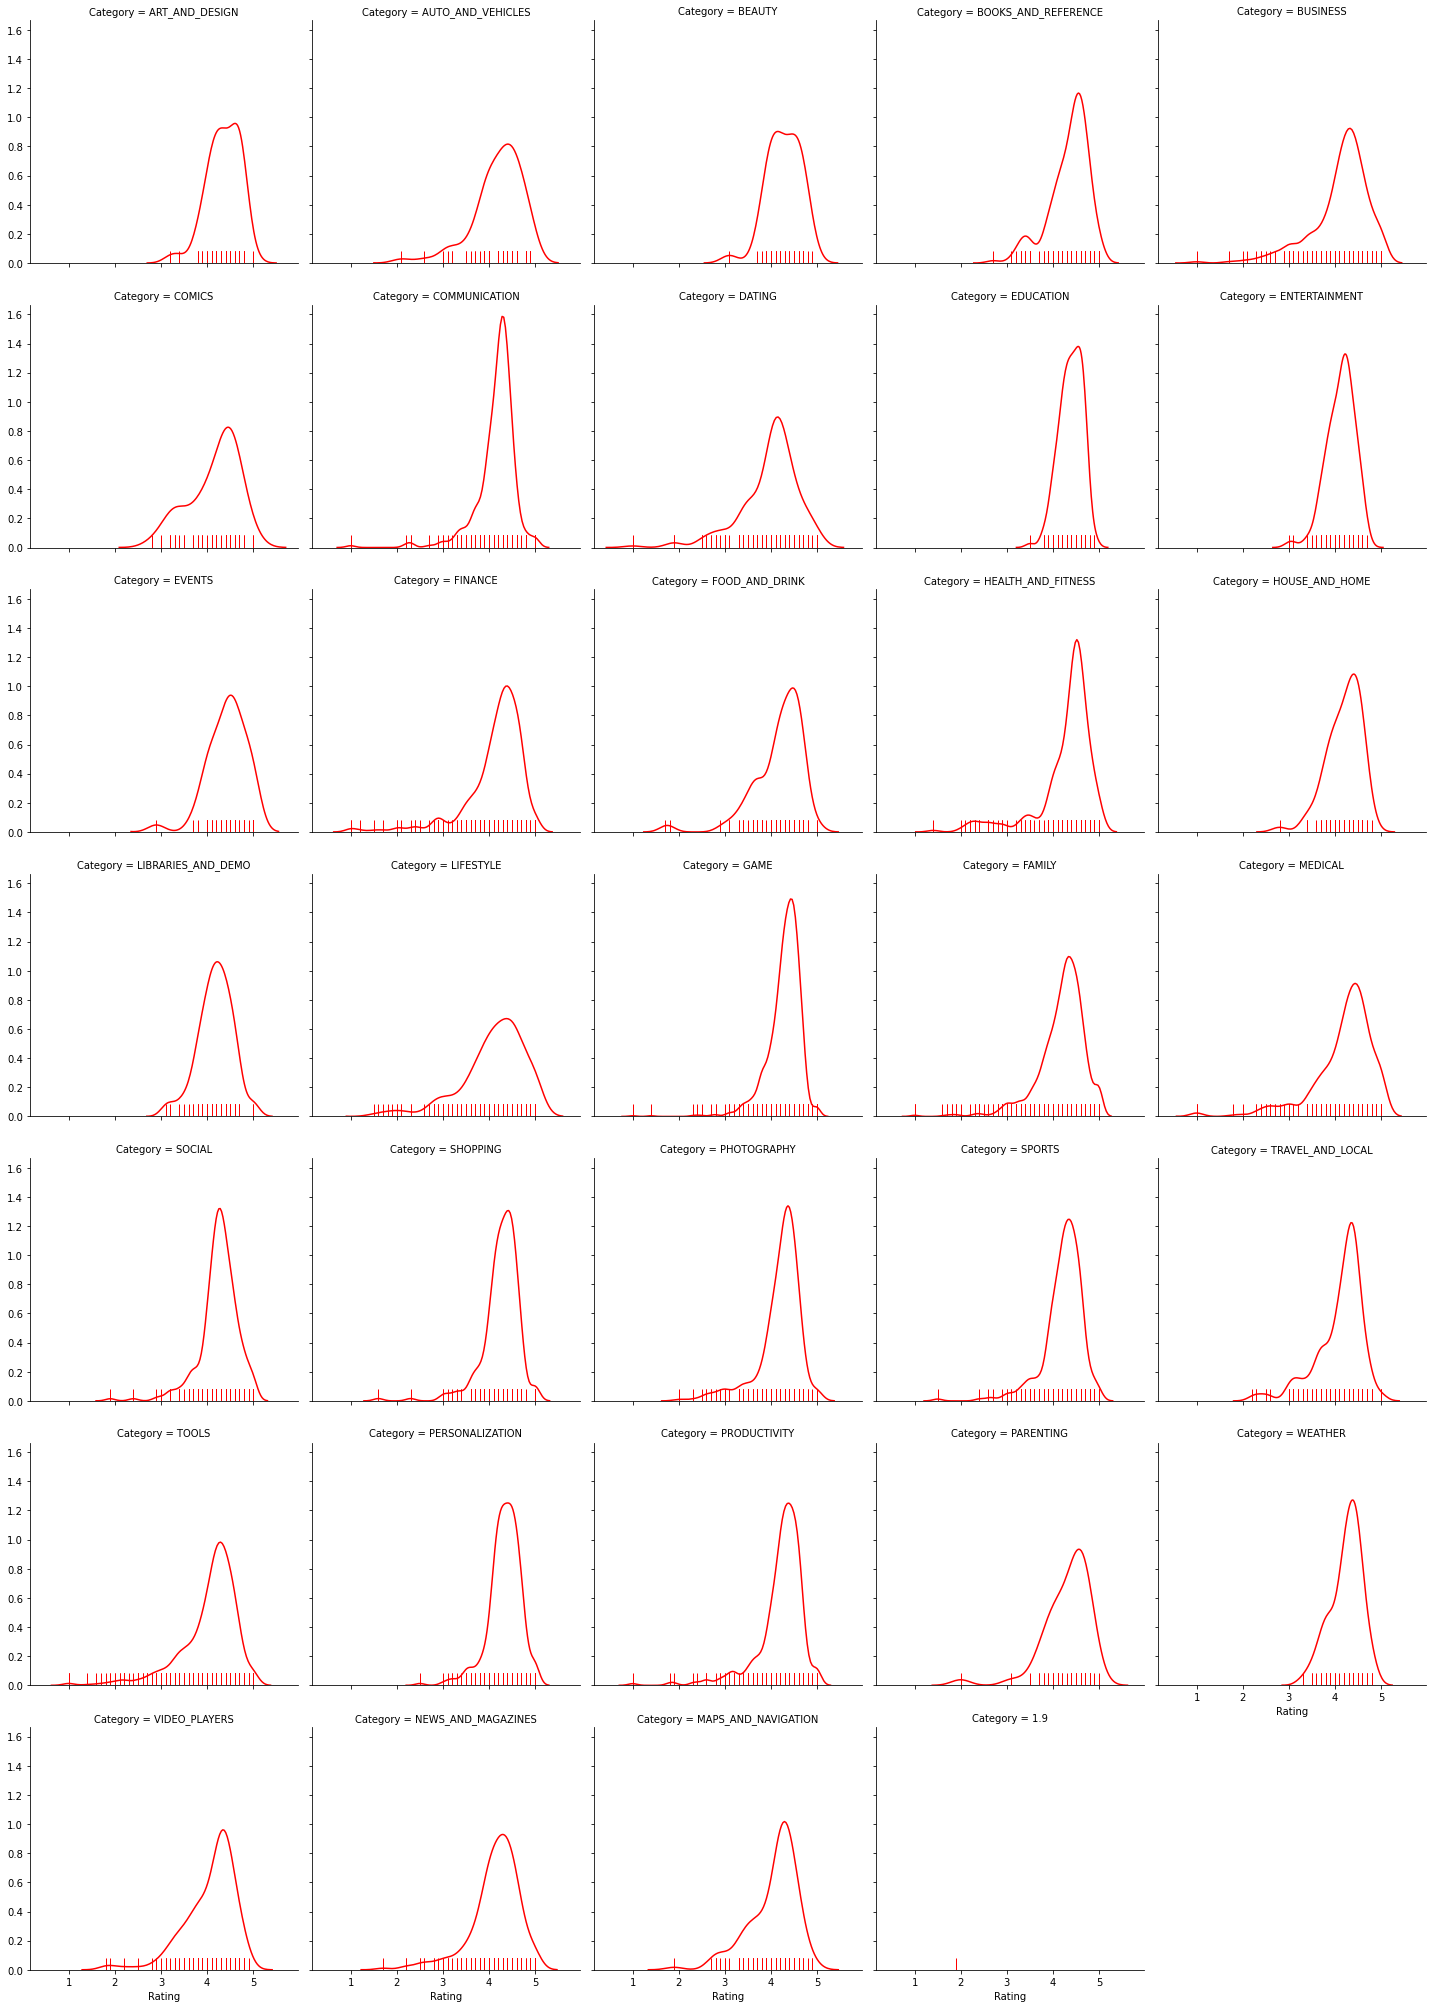

In [8]:
g = sns.FacetGrid(df, col='Category', palette="Set1",  col_wrap=5, height=4)
g = (g.map(sns.distplot, "Rating", hist=False, rug=True, color="r"))

Horizontal is the rating value, and vertically is quantity of the rating.

### Mean Rating

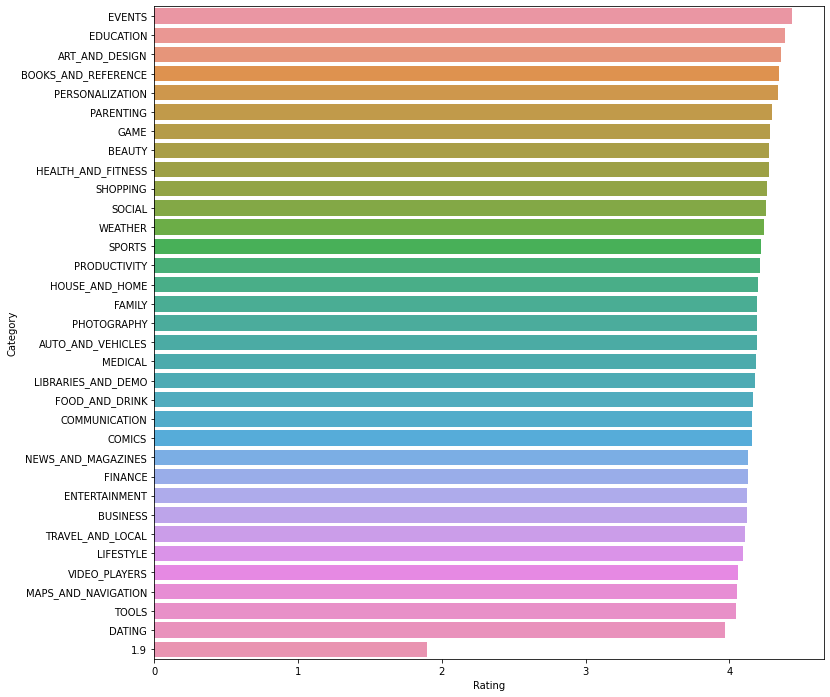

In [9]:
plt.figure(figsize=(12,12))
meanRat = df.groupby(['Category'])['Rating'].mean().sort_values(ascending=False)
sns.barplot(x=meanRat, y=meanRat.index, data=df)

And this is the average of rating by category, family and game has a lot of quantity causing the low on average rating, on the other side event has the highest average rating by category.

Next is reviews, review sometime can measure the app popularity. The more reviews, the better.

### Reviews

In [10]:
df.Reviews.unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

Inside review, there is a value with 3.0M with M standing for million, lets change it so it can be measure as float.

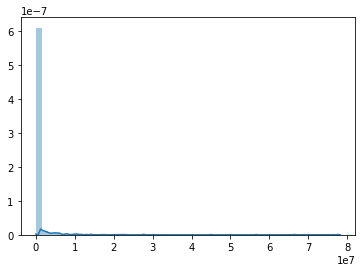

In [11]:
Reviews = []

for x in df.Reviews:
    x = x.replace('M','00')
    Reviews.append(x)

Reviews = list(map(float, Reviews))
df['reviews'] = Reviews
sns.distplot(Reviews)

This graph is the distribution of total reviews on each app.

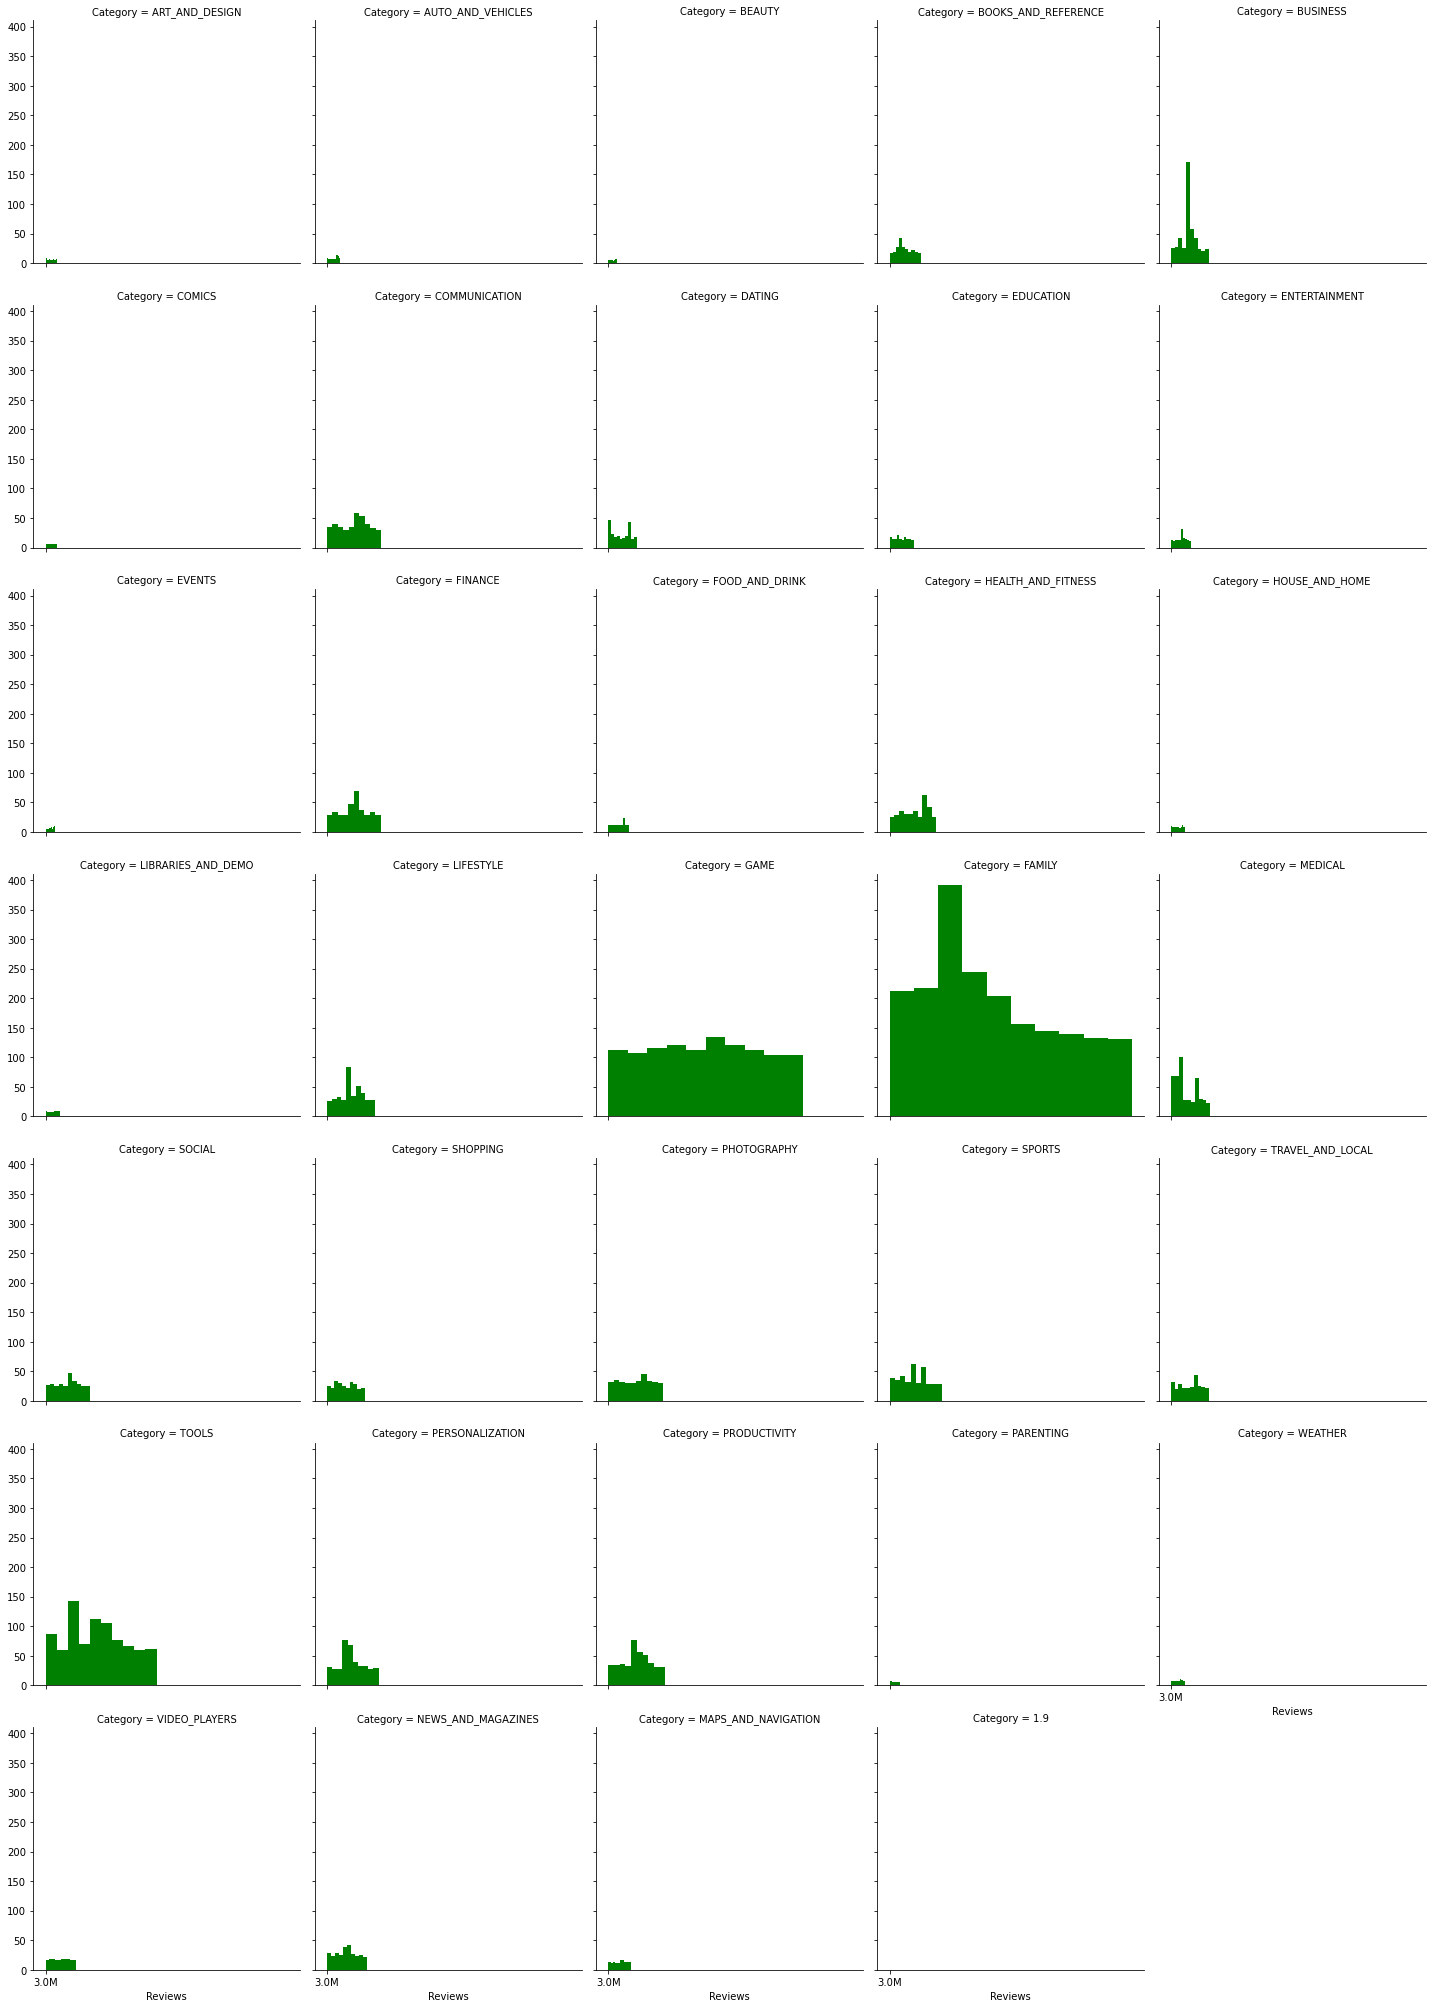

In [12]:
g = sns.FacetGrid(df, col='Category', palette="Set1",  col_wrap=5, height=4)
g = (g.map(plt.hist, "Reviews", color="g"))

This graph is the correlation between category and reviews, Family and game category had a lot of reviews.

Some apps also almost had no reviews at all, like event, beauty, medical, parenting and more. It is interesting Event app has a high rating but rarely any review on it.

### Total Reviews

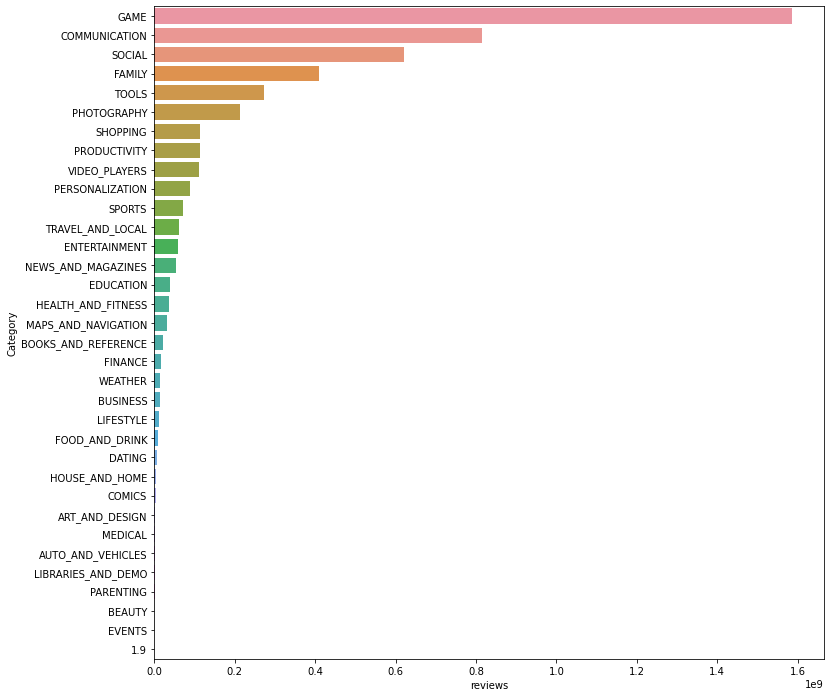

In [13]:
plt.figure(figsize=(12,12))
sumRew = df.groupby(['Category'])['reviews'].sum().sort_values(ascending=False)
sns.barplot(x=sumRew, y=sumRew.index, data=df)

### Mean Reviews

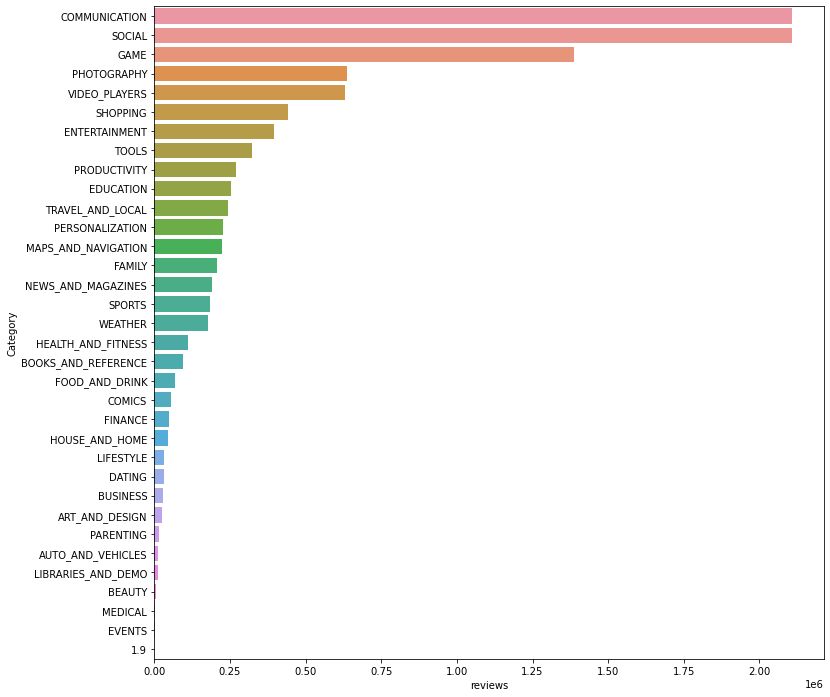

In [14]:
plt.figure(figsize=(12,12))
meanRew = df.groupby(['Category'])['reviews'].mean().sort_values(ascending=False)
sns.barplot(x=meanRew, y=meanRew.index, data=df)

### Installs

In [15]:
df.Installs.unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

Now i’m going to transform this column into float as well like review. First we need to change the 0 and Free value to 0+.

Next we need to replace the ‘,’ value and discard the + sign form the value.

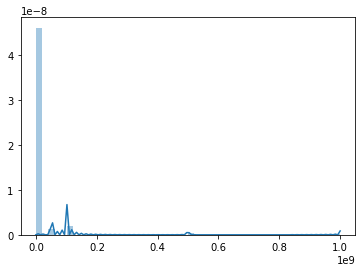

In [16]:
df['Installs'].replace(to_replace=['0', 'Free'], value=['0+','0+'],inplace=True)
Installs = []

for x in df.Installs:
    x = x.replace(',', '')
    Installs.append(x[:-1])

Installs = list(map(float, Installs))
df['installs'] = Installs
sns.distplot(Installs)

Distributed value of Install on each category.

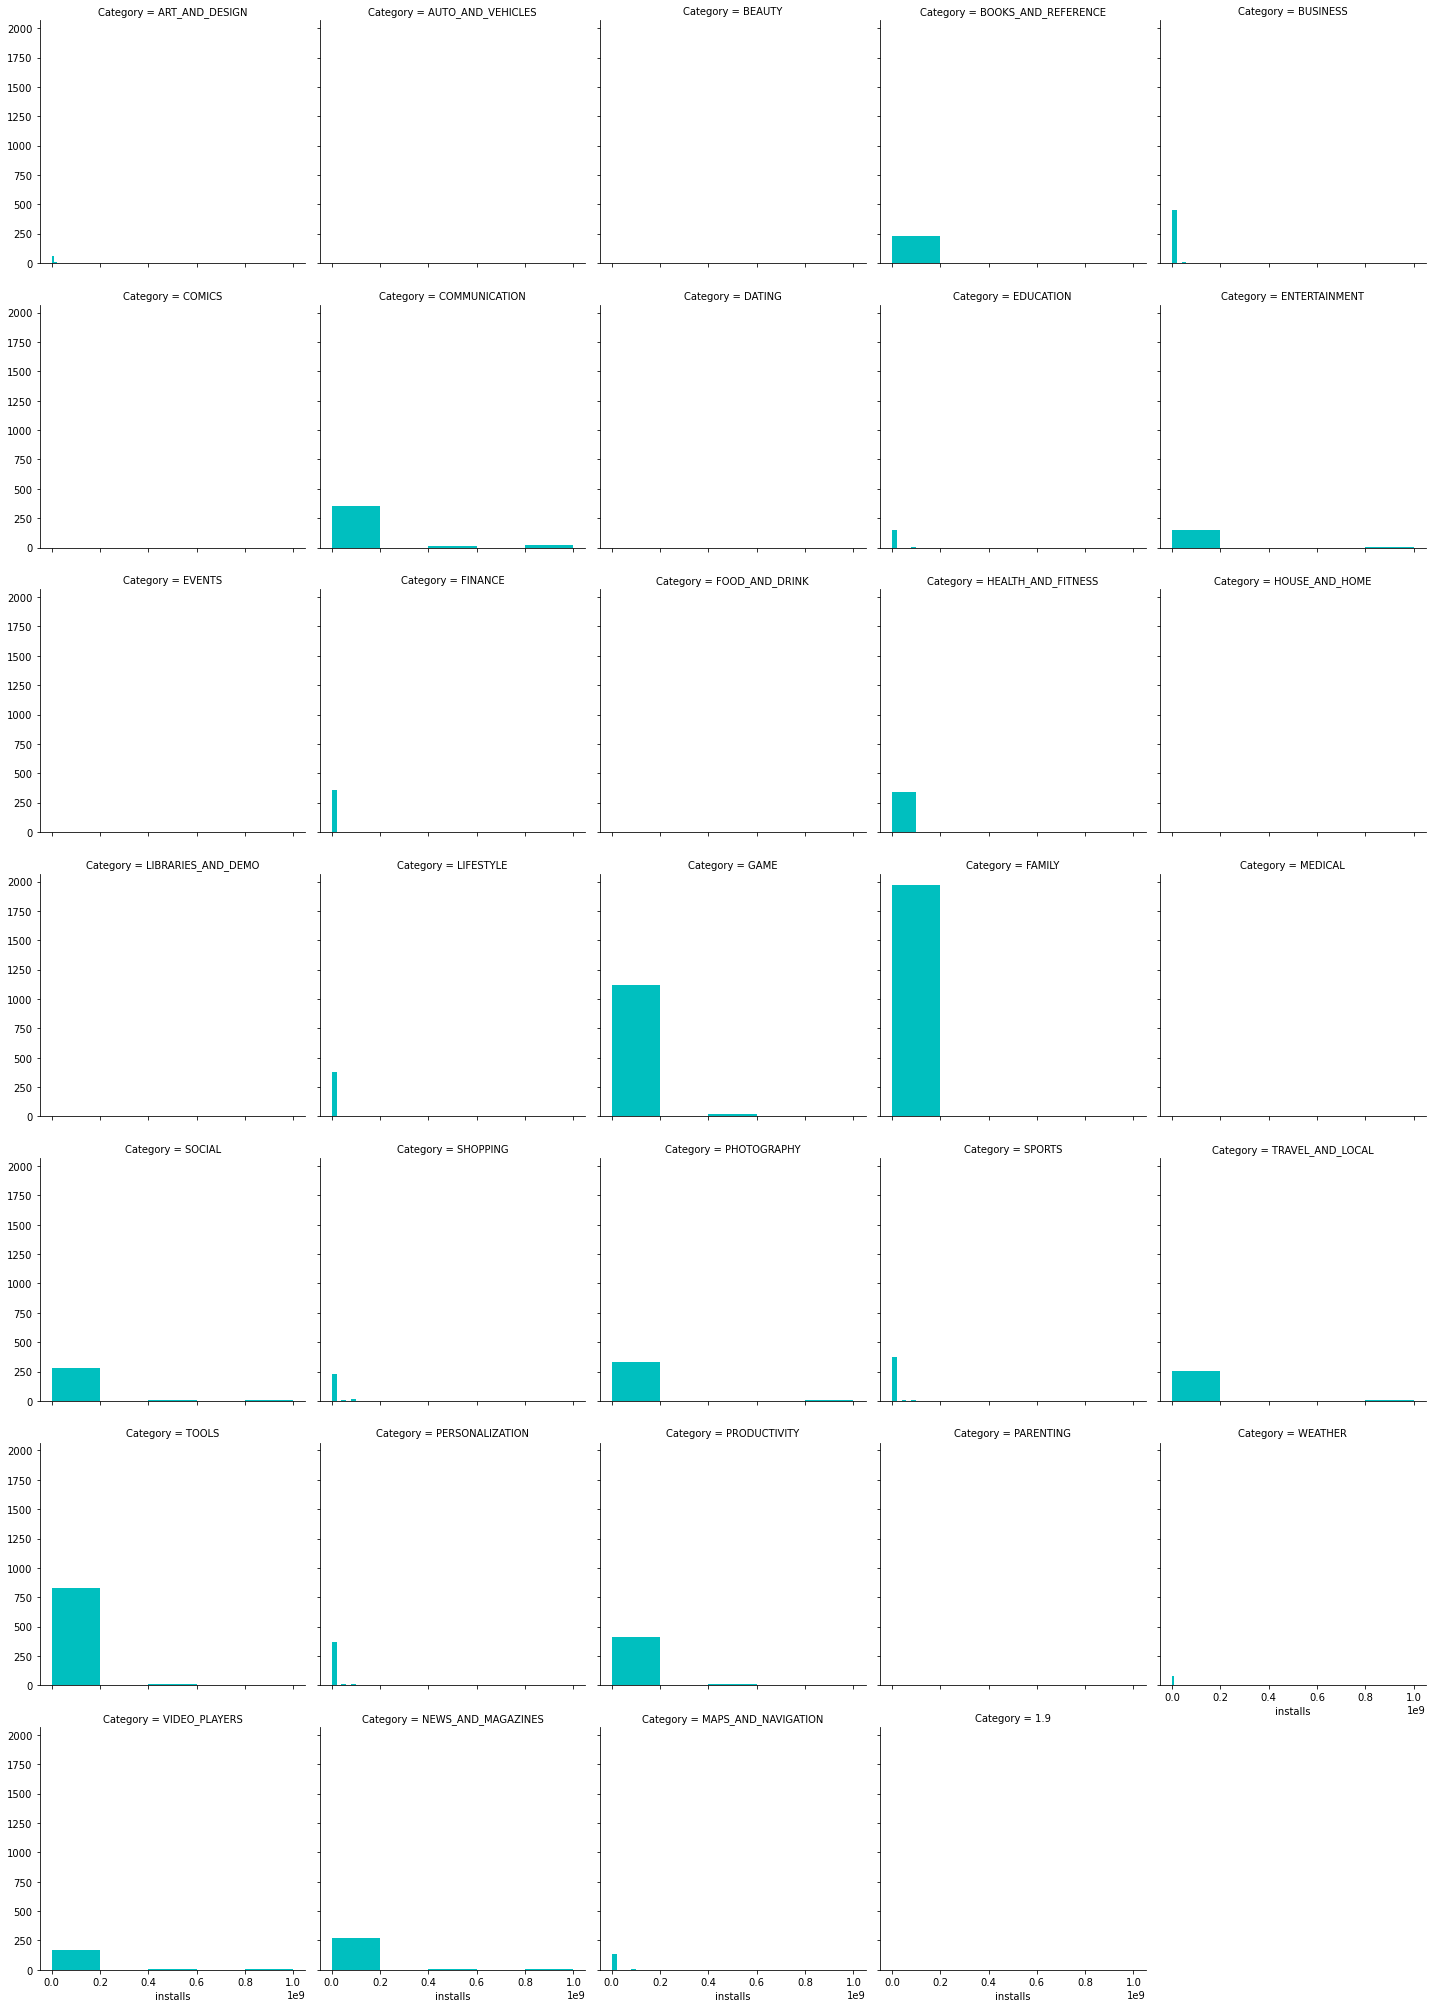

In [17]:
g = sns.FacetGrid(df, col='Category', palette="Set1",  col_wrap=5, height=4)
g = (g.map(plt.hist, "installs", bins=5, color='c'))

### Total Installs

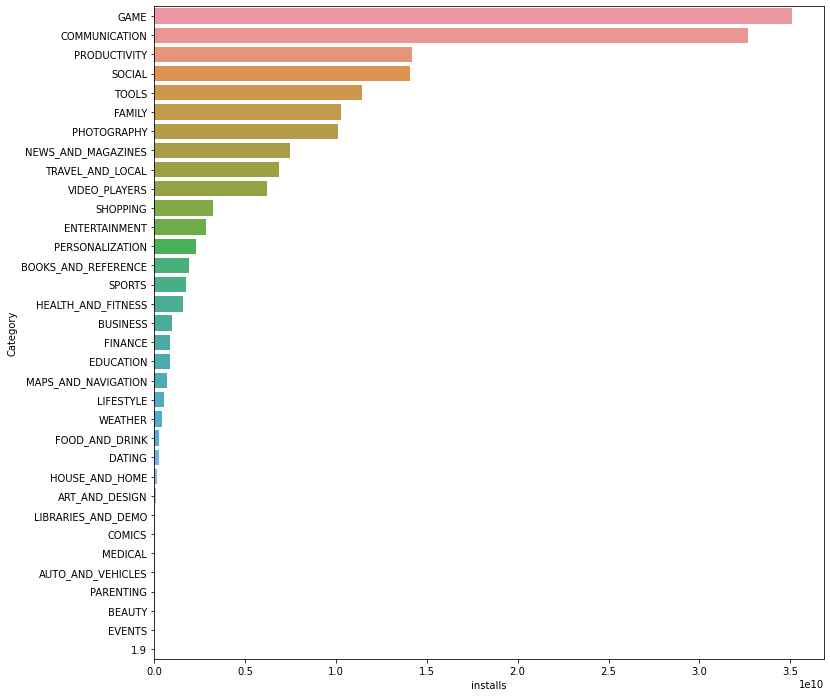

In [18]:
plt.figure(figsize=(12,12))
sumInst = df.groupby(['Category'])['installs'].sum().sort_values(ascending=False)
sns.barplot(x=sumInst, y=sumInst.index, data=df)

### Mean Installs

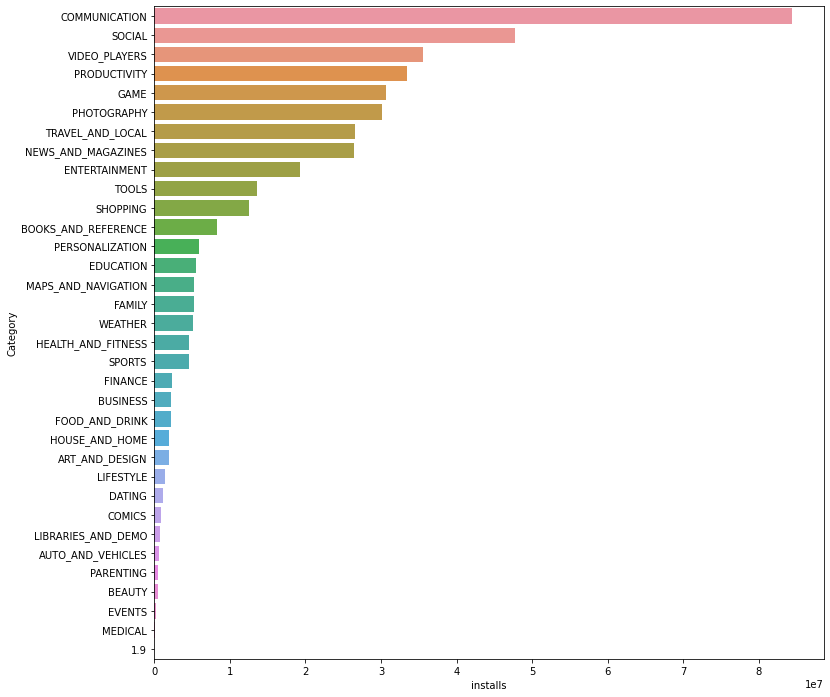

In [19]:
plt.figure(figsize=(12,12))
meanInts = df.groupby(['Category'])['installs'].mean().sort_values(ascending=False)
sns.barplot(x=meanInts, y=meanInts.index, data=df)

### Type for category

In [20]:
df.Type.unique()

array(['Free', 'Paid', nan, '0'], dtype=object)

There is 0 and null value, let’s change them to free.

In [21]:
df['Type'].replace(to_replace=['0'], value=['Free'],inplace=True)
df['Type'].fillna('Free', inplace=True)

In [22]:
print(df.groupby('Category')['Type'].value_counts())

Category             Type
1.9                  Free       1
ART_AND_DESIGN       Free      62
                     Paid       3
AUTO_AND_VEHICLES    Free      82
                     Paid       3
BEAUTY               Free      53
BOOKS_AND_REFERENCE  Free     203
                     Paid      28
BUSINESS             Free     446
                     Paid      14
COMICS               Free      60
COMMUNICATION        Free     360
                     Paid      27
DATING               Free     227
                     Paid       7
EDUCATION            Free     152
                     Paid       4
ENTERTAINMENT        Free     147
                     Paid       2
EVENTS               Free      63
                     Paid       1
FAMILY               Free    1781
                     Paid     191
FINANCE              Free     349
                     Paid      17
FOOD_AND_DRINK       Free     125
                     Paid       2
GAME                 Free    1061
                     P

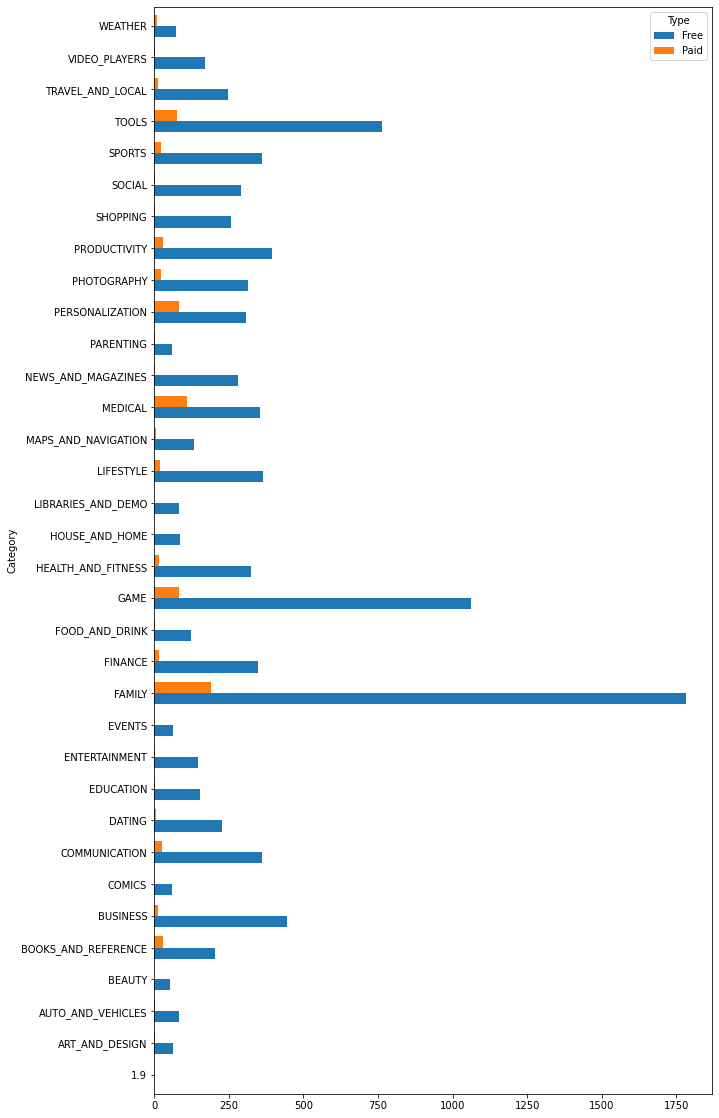

In [23]:
TypeCat = df.groupby('Category')['Type'].value_counts().unstack().plot.barh(figsize=(10,20), width=0.7)
plt.show()

So again, family category has the most free and paid apps on the google play store. We can see social apps are always free, like entertainment, event, education, comic, and more.

The medical has a high amount of paid apps considering quantity of medical app is not much.

### Android Version

In [24]:
df['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

Now I am going to group it to 1 till 8 version of android. Change the null value to 1.0.

In [25]:
df['Android Ver'].replace(to_replace=['4.4W and up','Varies with device'], value=['4.4','1.0'],inplace=True)
df['Android Ver'].replace({k: '1.0' for k in ['1.0','1.0 and up','1.5 and up','1.6 and up']},inplace=True)
df['Android Ver'].replace({k: '2.0' for k in ['2.0 and up','2.0.1 and up','2.1 and up','2.2 and up','2.2 - 7.1.1','2.3 and up','2.3.3 and up']},inplace=True)
df['Android Ver'].replace({k: '3.0' for k in ['3.0 and up','3.1 and up','3.2 and up']},inplace=True)
df['Android Ver'].replace({k: '4.0' for k in ['4.0 and up','4.0.3 and up','4.0.3 - 7.1.1','4.1 and up','4.1 - 7.1.1','4.2 and up','4.3 and up','4.4','4.4 and up']},inplace=True)
df['Android Ver'].replace({k: '5.0' for k in ['5.0 - 6.0','5.0 - 7.1.1','5.0 - 8.0','5.0 and up','5.1 and up']},inplace=True)
df['Android Ver'].replace({k: '6.0' for k in ['6.0 and up']},inplace=True)
df['Android Ver'].replace({k: '7.0' for k in ['7.0 - 7.1.1','7.0 and up','7.1 and up']},inplace=True)
df['Android Ver'].replace({k: '8.0' for k in ['8.0 and up']},inplace=True)
df['Android Ver'].fillna('1.0', inplace=True)

In [26]:
print(df.groupby('Category')['Android Ver'].value_counts())

Category             Android Ver
1.9                  1.0              1
ART_AND_DESIGN       4.0             51
                     2.0              9
                     1.0              2
                     3.0              2
                     5.0              1
AUTO_AND_VEHICLES    4.0             60
                     1.0              7
                     2.0              7
                     5.0              6
                     6.0              4
                     3.0              1
BEAUTY               4.0             40
                     1.0              4
                     5.0              4
                     3.0              3
                     2.0              2
BOOKS_AND_REFERENCE  4.0            125
                     1.0             50
                     2.0             39
                     3.0             12
                     5.0              3
                     6.0              1
                     7.0              1
BUSINES

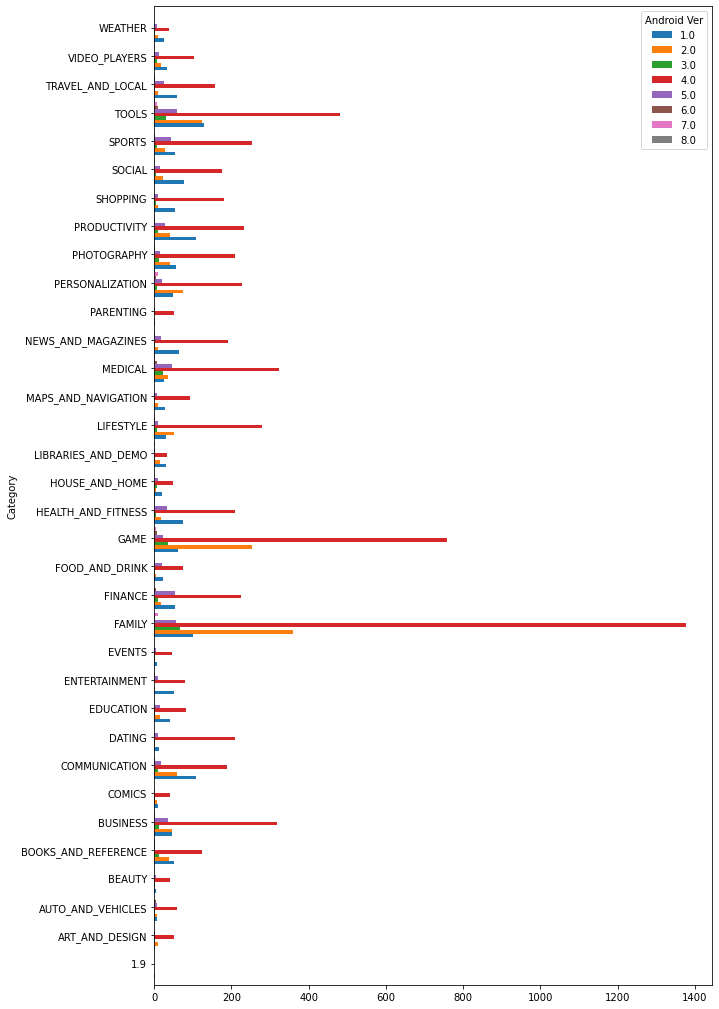

In [27]:
TypeCat = df.groupby('Category')['Android Ver'].value_counts().unstack().plot.barh(figsize=(10,18), width=1)
plt.show()

This dataset contains a good set of possibilities, to work more on the business values and leaving with a positive impact. This work is not restricted to until the exploration of this article.